In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
file_list = ['S006.csv','S008.csv','S009.csv','S010.csv','S012.csv','S013.csv','S014.csv','S015_fix.csv','S016.csv',
             'S017.csv','S018.csv','S019.csv','S020.csv','S021_fix.csv','S022.csv','S023_fix.csv','S024.csv','S025.csv',
             'S026.csv','S027.csv','S028.csv','S029.csv',]

In [3]:
# Append all df's into a single combined dataframe
df_combined = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    df_combined = pd.concat([df_combined, df])

df_combined = df_combined.drop('label', axis=1)

In [4]:
data = df_combined
data.drop(['timestamp'], axis=1, inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='plasma', alpha=0.5)
plt.title('KMeans Clustering')
plt.colorbar()
plt.show()

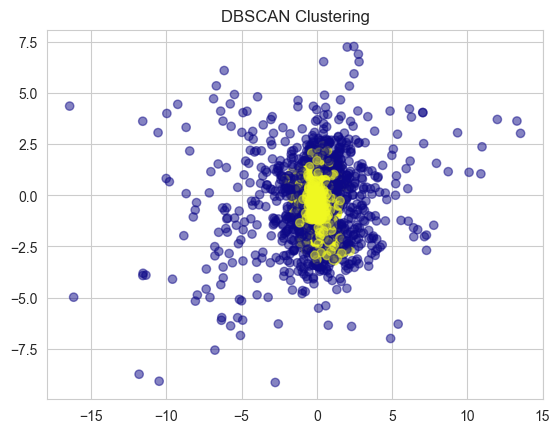

In [61]:
df = pd.read_csv(os.path.join('harth/', file_list[7]))
df = df.drop(['timestamp', 'label'], axis = 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.head(10000))

dbscan = DBSCAN(eps=1, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='plasma', alpha=0.5)
plt.title('DBSCAN Clustering')
# plt.colorbar()
plt.show()